<a href="https://colab.research.google.com/github/stevengregori92/Learn-XGBoost/blob/main/Predict_Approx_Total_Revenue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install luwiji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.8 MB/s eta 0:00:00
  Created wheel for luwiji: filename=luwiji-1.2.1-py2.py3-none-any.whl size=40366830 sha256=e926c3732233f29c1ff632aa39036ea6d97c2ff004d574eea8609fe390f8f296
  Stored in directory: /root/.cache/pip/wheels/ba/90/9e/943ac5067e9cdc185d8f029a1d13278acd52839118acc06c9a
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32178 sha256=35167c4dec650affa0648ac5cb500142174bf801ad4f4e8633f9ae2e7193133b
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built luwiji jcopml


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

#Import Dataset

In [3]:
!gdown https://drive.google.com/uc?id=1F-t29k5lN_8ccgD41V4DV-CULyUvLqWr

Downloading...
From: https://drive.google.com/uc?id=1F-t29k5lN_8ccgD41V4DV-CULyUvLqWr
To: /content/DairySales.zip
100% 233k/233k [00:00<00:00, 129MB/s]


In [4]:
!unzip /content/DairySales.zip

Archive:  /content/DairySales.zip
  inflating: dairy_dataset.csv       


In [20]:
df = pd.read_csv('dairy_dataset.csv', index_col = 'Product ID')
pd.options.display.max_columns = 50
df

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product Name,Brand,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Storage Condition,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
Product ID,,,,,,,,,,,,,,,,,,,,,,
5,Telangana,310.84,96,Medium,2022-02-17,Ice Cream,Dodla Dairy,222.40,85.72,19064.1280,25,Frozen,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,Milk,Amul,687.48,42.61,29293.5228,22,Tetra Pack,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
4,Tamil Nadu,581.69,24,Medium,2022-02-28,Yogurt,Dodla Dairy,503.48,36.50,18377.0200,30,Refrigerated,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,Cheese,Britannia Industries,823.36,26.52,21835.5072,72,Frozen,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
8,Maharashtra,861.95,21,Medium,2020-12-14,Buttermilk,Mother Dairy,147.77,83.85,12390.5145,11,Refrigerated,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,Delhi,748.71,89,Medium,2022-02-24,Curd,Mother Dairy,554.90,88.45,49080.9050,5,Refrigerated,2022-02-16,2022-02-21,352,87.20,30694.40,Uttar Pradesh,Online,202,98.07,33.53
4,Jharkhand,385.91,29,Large,2022-05-14,Yogurt,Palle2patnam,818.33,55.35,45294.5655,23,Refrigerated,2022-03-22,2022-04-14,68,58.39,3970.52,Kerala,Retail,750,87.41,114.37
6,Chandigarh,311.54,65,Small,2020-01-05,Curd,Mother Dairy,583.56,92.61,54043.4916,7,Refrigerated,2020-01-04,2020-01-11,141,89.46,12613.86,Haryana,Retail,442,33.47,153.66


#Cleaning Dataset

,missing_value,%
Location,0,0.0
Total Land Area (acres),0,0.0
Number of Cows,0,0.0
Farm Size,0,0.0
Date,0,0.0
Product Name,0,0.0
Brand,0,0.0
Quantity (liters/kg),0,0.0
Price per Unit,0,0.0
Total Value,0,0.0


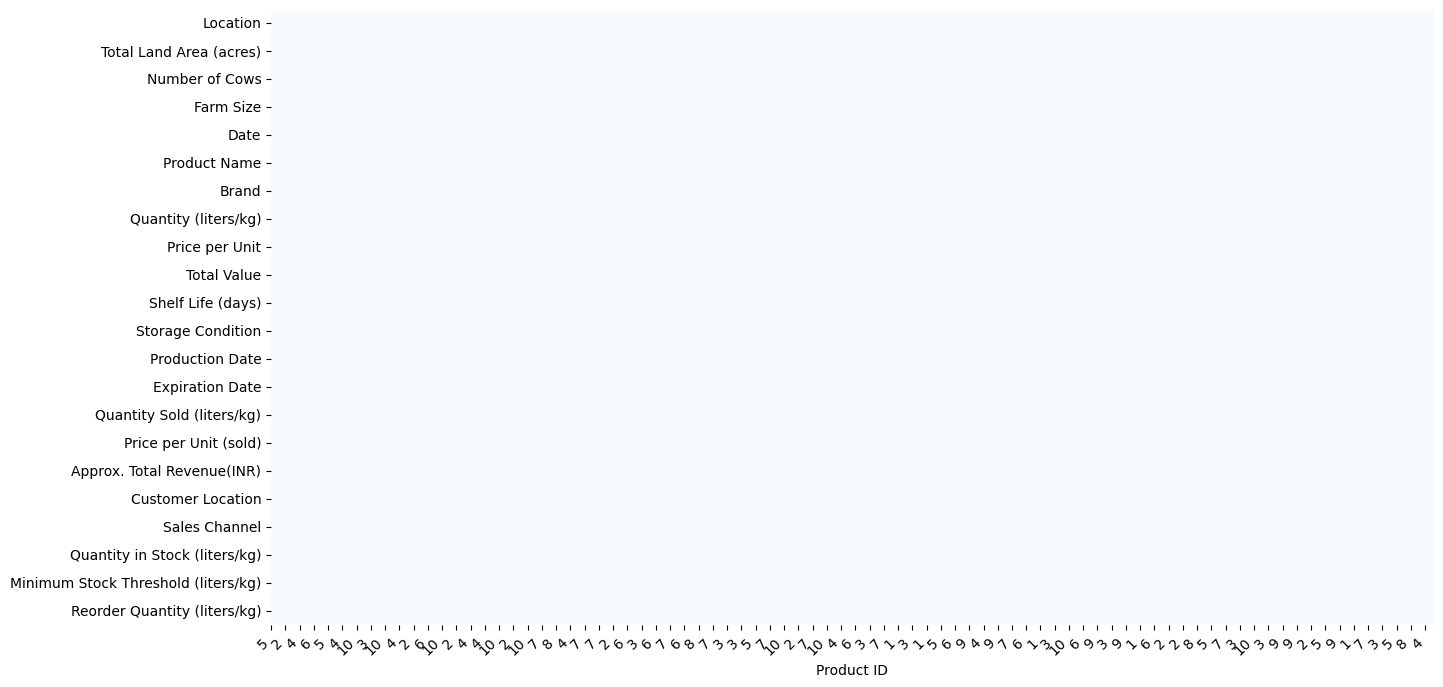

In [21]:
plot_missing_value(df, return_df=True)

In [22]:
df.drop(columns=['Date', 'Production Date', 'Expiration Date'], inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4325 entries, 5 to 1
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Product Name                         4325 non-null   object 
 5   Brand                                4325 non-null   object 
 6   Quantity (liters/kg)                 4325 non-null   float64
 7   Price per Unit                       4325 non-null   float64
 8   Total Value                          4325 non-null   float64
 9   Shelf Life (days)                    4325 non-null   int64  
 10  Storage Condition                    4325 non-null   object 
 11  Quantity Sold (liters/kg)        

#Dataset Splitting

In [25]:
X = df.drop(columns=['Approx. Total Revenue(INR)'])
y = df['Approx. Total Revenue(INR)']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3460, 18), (865, 18), (3460,), (865,))

#Training Section

In [26]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [27]:
X_train.columns

Index(['Location', 'Total Land Area (acres)', 'Number of Cows', 'Farm Size',
       'Product Name', 'Brand', 'Quantity (liters/kg)', 'Price per Unit',
       'Total Value', 'Shelf Life (days)', 'Storage Condition',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Customer Location', 'Sales Channel', 'Quantity in Stock (liters/kg)',
       'Minimum Stock Threshold (liters/kg)', 'Reorder Quantity (liters/kg)'],
      dtype='object')

In [28]:
df.iloc[0:2]

,Location,Total Land Area (acres),Number of Cows,Farm Size,Product Name,Brand,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Storage Condition,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
Product ID,,,,,,,,,,,,,,,,,,,
5,Telangana,310.84,96,Medium,Ice Cream,Dodla Dairy,222.40,85.72,19064.1280,25,Frozen,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,Milk,Amul,687.48,42.61,29293.5228,22,Tetra Pack,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10


In [30]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['Total Land Area (acres)', 'Number of Cows', 'Quantity (liters/kg)',
                             'Price per Unit', 'Total Value', 'Shelf Life (days)',
                             'Quantity Sold (liters/kg)', 'Quantity in Stock (liters/kg)',
                             'Reorder Quantity (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
                             'Price per Unit (sold)']),
    ('categoric', cat_pipe(), ['Location', 'Farm Size', 'Storage Condition', 'Product Name',
                               'Brand', 'Customer Location', 'Sales Channel'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.9763799669573133, 'algo__gamma': 3, 'algo__learning_rate': 0.05820013372709852, 'algo__max_depth': 4, 'algo__n_estimators': 163, 'algo__reg_alpha': 0.07362945281639222, 'algo__reg_lambda': 2.752717392942944, 'algo__subsample': 0.6401537692938899}
0.998985293912413 0.9966198733148994 0.9977147702693235


#Feature Importance

,feature,importance,stdev
11,Quantity Sold (liters/kg),1.227329e+00,3.247148e-02
12,Price per Unit (sold),2.674771e-01,4.801545e-03
8,Total Value,1.151639e-01,1.909245e-03
15,Quantity in Stock (liters/kg),6.189648e-03,1.871161e-04
7,Price per Unit,2.897610e-03,9.134520e-05
6,Quantity (liters/kg),1.206033e-04,1.034343e-05
1,Total Land Area (acres),2.809827e-05,8.546106e-06
16,Minimum Stock Threshold (liters/kg),2.313387e-05,2.817614e-06
0,Location,2.188100e-05,5.220783e-06
13,Customer Location,1.900024e-05,1.530271e-06


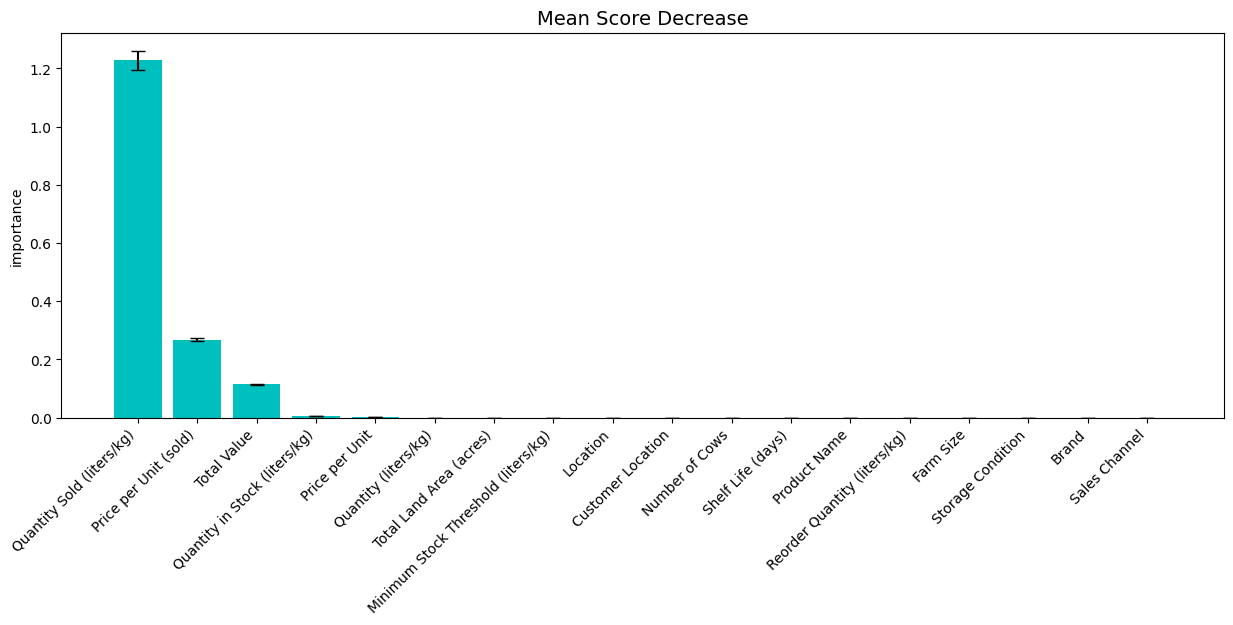

In [31]:
mean_score_decrease(X_train, y_train, model, plot=True)

In [32]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['Quantity (liters/kg)', 'Price per Unit (sold)', 'Total Value',
                             'Quantity Sold (liters/kg)'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.9763799669573133, 'algo__gamma': 3, 'algo__learning_rate': 0.05820013372709852, 'algo__max_depth': 4, 'algo__n_estimators': 163, 'algo__reg_alpha': 0.07362945281639222, 'algo__reg_lambda': 2.752717392942944, 'algo__subsample': 0.6401537692938899}
0.9982534959277218 0.9948753883106282 0.996416946667671


#Confusion Matrix

In [35]:
df.iloc[0:3]

,Location,Total Land Area (acres),Number of Cows,Farm Size,Product Name,Brand,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Storage Condition,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
Product ID,,,,,,,,,,,,,,,,,,,
5,Telangana,310.84,96,Medium,Ice Cream,Dodla Dairy,222.40,85.72,19064.1280,25,Frozen,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,Milk,Amul,687.48,42.61,29293.5228,22,Tetra Pack,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
4,Tamil Nadu,581.69,24,Medium,Yogurt,Dodla Dairy,503.48,36.50,18377.0200,30,Refrigerated,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83


In [42]:
data = [
    ['Uttar Pradesh', 19.19	, 44, 'Large', 'Milk', 'Amul', 687.48, 42.61,
     29293.5228, 22, 'Tetra Pack', 558, 39.24	, 'Kerala', 'Wholesale', 129,
     43.17, 181.10],
    ['Telanga', 310.84, 96, 'Medium', 'Ice Cream', 'Dodla Dairy', 222.40, 85.72,
     19064.1280, 25, 'Frozen', 777, 82.24, 'Madhya Pradesh', 'Wholesale', 215,
     19.55, 64.03]
]

X_pred = pd.DataFrame(data, index=[0,1], columns=X.columns)
X_pred

,Location,Total Land Area (acres),Number of Cows,Farm Size,Product Name,Brand,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Storage Condition,Quantity Sold (liters/kg),Price per Unit (sold),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Uttar Pradesh,19.19,44,Large,Milk,Amul,687.48,42.61,29293.5228,22,Tetra Pack,558,39.24,Kerala,Wholesale,129,43.17,181.10
1,Telanga,310.84,96,Medium,Ice Cream,Dodla Dairy,222.40,85.72,19064.1280,25,Frozen,777,82.24,Madhya Pradesh,Wholesale,215,19.55,64.03


In [43]:
df.iloc[0:3]

,Location,Total Land Area (acres),Number of Cows,Farm Size,Product Name,Brand,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Storage Condition,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
Product ID,,,,,,,,,,,,,,,,,,,
5,Telangana,310.84,96,Medium,Ice Cream,Dodla Dairy,222.40,85.72,19064.1280,25,Frozen,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,Milk,Amul,687.48,42.61,29293.5228,22,Tetra Pack,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
4,Tamil Nadu,581.69,24,Medium,Yogurt,Dodla Dairy,503.48,36.50,18377.0200,30,Refrigerated,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83


In [44]:
X_pred['Approx. Total Revenue(INR)'] = model.predict(X_pred)
X_pred

,Location,Total Land Area (acres),Number of Cows,Farm Size,Product Name,Brand,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Storage Condition,Quantity Sold (liters/kg),Price per Unit (sold),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg),Approx. Total Revenue(INR)
0,Uttar Pradesh,19.19,44,Large,Milk,Amul,687.48,42.61,29293.5228,22,Tetra Pack,558,39.24,Kerala,Wholesale,129,43.17,181.10,24386.152344
1,Telanga,310.84,96,Medium,Ice Cream,Dodla Dairy,222.40,85.72,19064.1280,25,Frozen,777,82.24,Madhya Pradesh,Wholesale,215,19.55,64.03,39146.886719
